Busqueda en una lista no estructurada

[0,1,2,...,w,...,N] --> N= 2^n

### Oraculo

Codificacion --> Función  𝑓  que devuelve  𝑓(𝑥)=0  para todos los items no marcados  𝑥  y  𝑓(𝑤)=1  para el "ganador".

### Amplificacion de la amplitud

- 1 Superposicion uniforme

![grover_step1](./img/grover_step1.png)

- 2 Aplicar una inversion del oraculo 𝑈𝑓  

![grover_step2](./img/grover_step2.png)

- 3 Aplicar inversion 𝑈𝑠

![grover_step3](./img/grover_step3.png)


[Informacion de Qiskit sobre grover](https://qiskit.org/textbook/ch-algorithms/grover.html)

In [73]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [74]:
def build_grover_circuit(search_bits):
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)

    groverCircuit = QuantumCircuit(qr,cr)
    groverCircuit.h(qr)
    groverCircuit.barrier()
    
    search = {
        "00": qr,
        "01": qr[0],
        "10": qr[1]
    }
    if search_bits != '11':
        groverCircuit.x(search[search_bits])
    
    groverCircuit.cz(qr[0],qr[1])

    if search_bits != '11':
        groverCircuit.x(search[search_bits])
    groverCircuit.barrier()
    
    
    groverCircuit.h(qr)
    groverCircuit.z(qr)
    groverCircuit.cz(qr[0],qr[1])
    groverCircuit.h(qr)
        
    return groverCircuit, qr, cr

In [75]:
groverCircuit, qr, cr = build_grover_circuit('10')

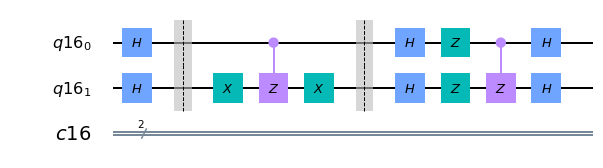

In [76]:
groverCircuit.draw(output="mpl")

In [77]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[-3.92523115e-17+2.79523858e-32j  1.00000000e+00-2.44929360e-16j
 -3.92523115e-17+2.79523858e-32j -1.11022302e-16+1.22464680e-16j]


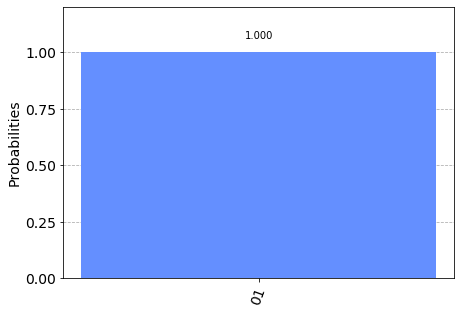

In [78]:
groverCircuit.measure(qr,cr)

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts() 
plot_histogram(answer)